In [31]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [35]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

# setting the seed
rng.current = 1
samples = [rng() for _ in range(1000)]

Задача 1
Реализовать serial test и применить к выборке samples

In [243]:
def serial_test(n, samples):
    f_obs = np.histogram2d(samples[::2], samples[1::2], bins=[n, n])
    f_exp = np.full(n*n, len(samples)//(2*n*n))

    print(f_obs[0]) 
    print(f_exp) 
    print(stats.chisquare(f_obs[0].reshape(n**2,), f_exp))
    
serial_test(10, samples)

[[156. 144. 175. 163. 153. 154. 162. 148. 151. 149.]
 [152. 169. 144. 156. 157. 142. 168. 164. 171. 152.]
 [161. 142. 147. 160. 139. 134. 131. 171. 154. 152.]
 [154. 140. 137. 150. 157. 143. 145. 135. 138. 157.]
 [159. 150. 166. 140. 146. 141. 162. 168. 156. 161.]
 [155. 153. 149. 154. 145. 149. 138. 123. 158. 152.]
 [148. 134. 176. 149. 160. 143. 152. 144. 158. 165.]
 [153. 146. 144. 147. 150. 135. 130. 135. 139. 146.]
 [156. 150. 152. 143. 141. 157. 141. 140. 150. 150.]
 [159. 154. 153. 140. 159. 152. 130. 140. 147. 130.]]
[150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150]
Power_divergenceResult(statistic=74.16000000000001, pvalue=0.9

Задача 3
Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [70]:
random = [rng_bad() for _ in range(30000)] 
samples = [rng() for _ in range(30000)] 
print(stats.kstest(samples, stats.uniform.cdf))
print(stats.kstest(random, stats.uniform.cdf))

KstestResult(statistic=0.004454592167586036, pvalue=0.5894302243163333)
KstestResult(statistic=0.00908406291988989, pvalue=0.014063463775816798)


Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

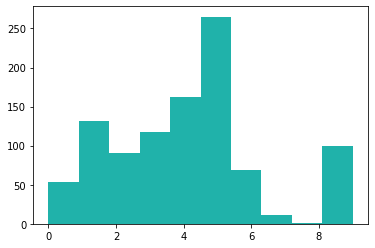

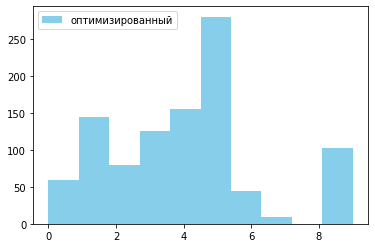

In [29]:

def select(weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])):
    new_weight = np.zeros(11)
    for i in range(1, 11):
      new_weight[i] = new_weight[i - 1] + weight[i - 1]
    c = np.random.rand() * weight.sum() 
    for i in range (10): 
        if(new_weight[i]<= c < new_weight[i+1]):
          return i

def select_order(weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])):
    a = np.sort(weight)
    b = np.argsort(weight)
    new_weight = np.zeros(11)
    for i in range(1, 11):
      new_weight[i] = new_weight[i - 1] + a[i - 1]
    c = np.random.rand() * weight.sum() 
    for i in range (10): 
        if(new_weight[i]<= c < new_weight[i+1]):
          return b[i]

random = [select() for i in range(1000)]
random_ord = [select_order() for i in range(1000)]
plt.hist(random, color = "lightseagreen",)
plt.show()
plt.hist(random_ord, color = "skyblue", label="оптимизированный")
plt.legend()
plt.show()

Задача 5 Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

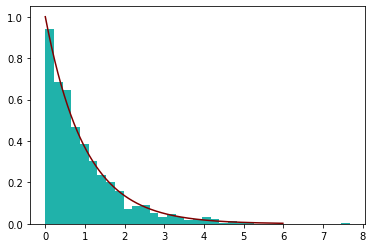

In [93]:
import math

def inverse(l):
  a = np.random.rand()
  return ((-math.log(1 - a))/l)

random = [inverse(1) for i in range(1000)]
plt.hist(random, color = "lightseagreen", bins = 35, density = True)
x = np.arange(0, 6, 0.01)
plt.plot(x, np.exp(-1 * x), color = "maroon")
plt.show()



Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

In [171]:
%matplotlib inline
#fig = plt.figure()
#fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
#plt.fill_between(x, 0, density)
#plt.ylabel('PDF (not normalized)')
#plt.xlabel('x')
#plt.show()
kll = 1/(max(density)*np.pi)
max(density)

1.2718704708119917

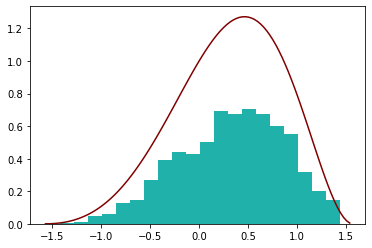

In [174]:
def rng():
    point = [0,0]
    point[0] = (np.random.rand() - 0.5)*np.pi
    point[1] = np.random.rand()
    while point[1] > np.exp(point[0])*kll*np.cos(point[0])**2:
      point[0] = (np.random.rand() - 0.5) * np.pi
      point[1] =  np.random.rand()
    return point
random = [rng() for i in range(1000)]
randomx = [random[i][0] for i in range(1000)]
randomy = [random[i][1] for i in range(1000)]
plt.hist(randomx , bins = 20, density = True, color = "lightseagreen")
X = np.arange(-np.pi/2, np.pi/2, np.pi/100)
plt.plot(X, np.exp(X) * np.cos(X)**2, color = "maroon")
plt.show()

Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

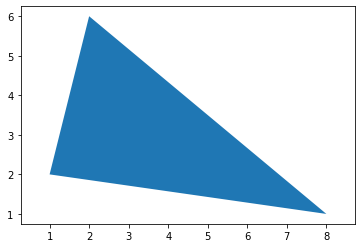

In [175]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

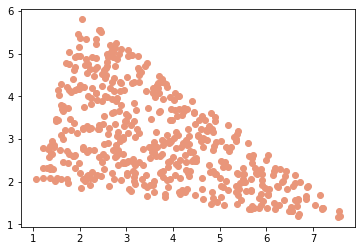

In [209]:
x = np.array([np.random.rand() for i in range(500)])
y = np.array([np.random.rand() for i in range(500)])
x[(x + y) > 1] = 1 - x[(x + y) > 1]
y[(x + y) > 1] = 1 - y[(x + y) > 1]
x_= np.array([np.random.rand() for i in range(500)])
x_ =  (7 * x + 1 * y + 1)
y  =  (-1 * x + 4 * y +  2)
plt.scatter(x_, y, color = 'darksalmon')
plt.show()

Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

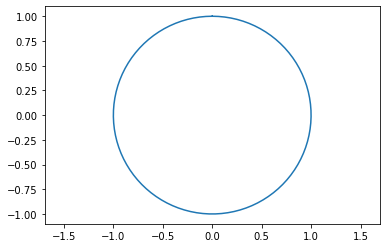

In [194]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

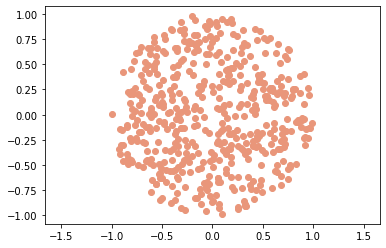

In [216]:
r = np.array([np.random.rand() for i in range(500)])
ang = np.array([2*np.pi *np.random.rand() for i in range(500)])
x = np.sqrt(r)*np.cos(ang)
y = np.sqrt(r)*np.sin(ang)
plt.axis('equal')
plt.scatter(x,y, color = 'darksalmon')
plt.show() 